✅ Found 1500 total files.
🕵️‍♀️ Auditing 100 random files for class distribution...


2026-02-11 18:29:43.692843: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2026-02-11 18:30:23.130509: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


[100/100] Scanning: koppen_shard_part_1266_of_1500.tfrecord.gz
✅ Audit Complete. Scanned 3893 images.

--- RAW COUNTS ---
Class 1: 95 images (2.4%)
Class 2: 113 images (2.9%)
Class 3: 129 images (3.3%)
Class 4: 136 images (3.5%)
Class 5: 134 images (3.4%)
Class 6: 142 images (3.6%)
Class 7: 134 images (3.4%)
Class 8: 134 images (3.4%)
Class 9: 123 images (3.2%)
Class 10: 134 images (3.4%)
Class 11: 128 images (3.3%)
Class 12: 123 images (3.2%)
Class 13: 132 images (3.4%)
Class 14: 134 images (3.4%)
Class 15: 143 images (3.7%)
Class 16: 137 images (3.5%)
Class 17: 132 images (3.4%)
Class 18: 139 images (3.6%)
Class 19: 140 images (3.6%)
Class 20: 132 images (3.4%)
Class 21: 139 images (3.6%)
Class 22: 121 images (3.1%)
Class 23: 138 images (3.5%)
Class 24: 114 images (2.9%)
Class 25: 129 images (3.3%)
Class 26: 144 images (3.7%)
Class 27: 132 images (3.4%)
Class 28: 120 images (3.1%)
Class 29: 108 images (2.8%)
Class 30: 134 images (3.4%)


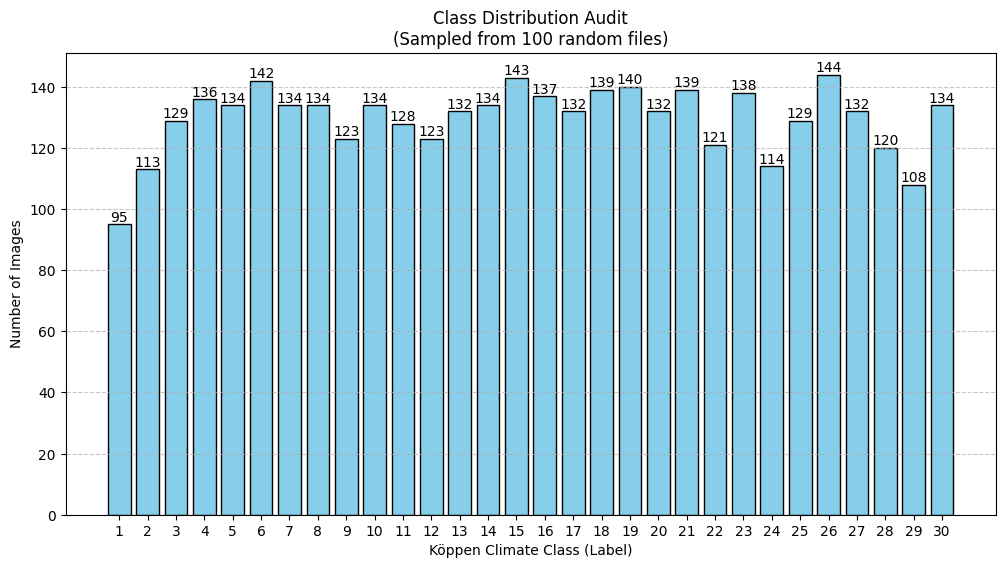

In [ ]:
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from collections import Counter

# --- CONFIGURATION ---
# Use your verified local path
data_path = '/Users/abhicado/Library/CloudStorage/GoogleDrive-agoda.wonders@gmail.com/My Drive/CS6140_Project_Data/*.tfrecord.gz'

# 1. Get all files and pick a random sample
files = glob.glob(data_path)
print(f"✅ Found {len(files)} total files.")

# We audit 20 random files to get a statistically significant sample
# (Reading all 1,500 would take too long for a quick check)
sample_size = min(100, len(files))
audit_files = random.sample(files, sample_size)
print(f"🕵️‍♀️ Auditing {sample_size} random files for class distribution...")

# 2. Define the Decoder
feature_description = {
    'classification': tf.io.FixedLenFeature([], tf.float32),
}

def parse_label_only(example_proto):
    # We only parse the label to make this super fast
    return tf.io.parse_single_example(example_proto, feature_description)

# 3. Count the Labels
label_counts = Counter()
total_images = 0

for i, file_path in enumerate(audit_files):
    print(f"[{i+1}/{sample_size}] Scanning: {os.path.basename(file_path)}", end="\r")
    
    raw_dataset = tf.data.TFRecordDataset(file_path, compression_type='GZIP')
    parsed_dataset = raw_dataset.map(parse_label_only)
    
    for features in parsed_dataset:
        label = int(features['classification'].numpy())
        label_counts[label] += 1
        total_images += 1

print(f"\n✅ Audit Complete. Scanned {total_images} images.")

# 4. Visualize the Results
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Sort for a cleaner graph
sorted_indices = np.argsort(labels)
labels = np.array(labels)[sorted_indices]
counts = np.array(counts)[sorted_indices]

print("\n--- RAW COUNTS ---")
for l, c in zip(labels, counts):
    print(f"Class {l}: {c} images ({c/total_images*100:.1f}%)")

plt.figure(figsize=(12, 6))
bars = plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.xlabel('Köppen Climate Class (Label)')
plt.ylabel('Number of Images')
plt.title(f'Class Distribution Audit\n(Sampled from {sample_size} random files)')
plt.xticks(labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add counts on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.show()

# --- USAGE IN TUNING ---
# 1. Train Model on Balanced Data
# 2. Predict on Balanced Validation Data
# 3. Score = calculate_real_world_score(val_labels, val_predictions)
# 4. Pick the hyperparams that maximize THIS score.